<a href="https://colab.research.google.com/github/seacatgm/-/blob/main/Computer%20vision/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%86%D0%B8%D1%84%D1%80%2C%20mnist/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image 
from google.colab import files 
import matplotlib.pyplot as plt
from PIL import Image 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import numpy as np
import pandas as pd

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() # Загрузка датасета mnist

In [ ]:
x_train_org[0].shape # размер изображений

(28, 28)

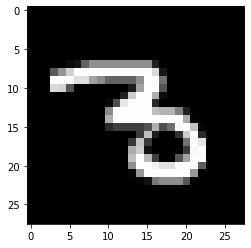

In [ ]:
n = 30 # посмотрим на цифру под номером 30
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB')) 
plt.show() 

In [ ]:
y_train_org[n] # посмотрим значение y по этой картинке

3

In [ ]:
x_train = x_train_org.reshape(60000, 784) # переводим изображение обучающей выборки в вектор
x_test = x_test_org.reshape(10000, 784) # переводим изображение тестовой выборки вектор
print(x_train_org.shape) # размер массива до reshape
print(x_train.shape) # размер массива после reshape

(60000, 28, 28)
(60000, 784)


In [ ]:
x_train = x_train.astype('float32') # для нормализации переводим значения в тип float
x_train = x_train / 255 # нормализуем значения от 0 до 1
x_test = x_test.astype('float32') # для нормализации переводим значения в тип float
x_test = x_test / 255 # нормализуем значения от 0 до 1

In [ ]:
y_train = utils.to_categorical(y_train_org, 10) # переводим y в бинарный вектор, one_hot_encoding
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(10, activation="relu"))  # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) # Вывод структуры модели

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                8010      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 636,120
Trainable params: 636,120
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1) # обучаем модель

Epoch 1/15
469/469 [==============================] - 5s 11ms/step - loss: 0.3234 - accuracy: 0.9094
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.1150 - accuracy: 0.9671
Epoch 3/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0764 - accuracy: 0.9773
Epoch 4/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0526 - accuracy: 0.9842
Epoch 5/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0364 - accuracy: 0.9894
Epoch 6/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0279 - accuracy: 0.9914
Epoch 7/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0210 - accuracy: 0.9936
Epoch 8/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0157 - accuracy: 0.9955
Epoch 9/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0158 - accuracy: 0.9952
Epoch 10/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0122 - accura

In [ ]:
# создадим словарь для проведенных экспериментов и запишем результаты
d = {"10 нейронов":pd.Series([0.9987, 0.0050], index=['accuracy', 'loss']),\
     "100 нейронов": pd.Series([0.9965, 0.0106], index=['accuracy', 'loss']),\
     "5000 нейронов": pd.Series([0.9963, 0.0126], index=['accuracy', 'loss']),\
     "linear": pd.Series([0.9276, 0.2588], index=['accuracy', 'loss']),\
     "batch_size 1": pd.Series([0.9855, 0.0837], index=['accuracy', 'loss']),\
     "batch_size 10": pd.Series([0.9963, 0.0117], index=['accuracy', 'loss']),\
     "batch_size 100": pd.Series([0.9988, 0.0036], index=['accuracy', 'loss']),\
     "batch_size 60000": pd.Series([0.9989, 0.0028], index=['accuracy', 'loss'])}
df = pd.DataFrame(d) # создаем dataframe 

In [ ]:
df.head() # выводим значение dataframe

,10 нейронов,100 нейронов,5000 нейронов,linear,batch_size 1,batch_size 10,batch_size 100,batch_size 60000
accuracy,0.9987,0.9965,0.9963,0.9276,0.9855,0.9963,0.9988,0.9989
loss,0.0050,0.0106,0.0126,0.2588,0.0837,0.0117,0.0036,0.0028


Вывод:
наилучшее количество нейронов 10,
наилучшая функция активации relu,
наилучший результат с batch_size 60000, но в то же время самый долгий

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Проведем пару тестов:

*   нарисуем цифру в paint и попробуем распознать
*   нарисуем цифру на листе и попробуем распознать



In [ ]:
number_5 = image.load_img('/content/drive/My Drive/5.jpg', target_size=(28, 28), color_mode = 'grayscale') # загружаем цифру нарисованную в paint

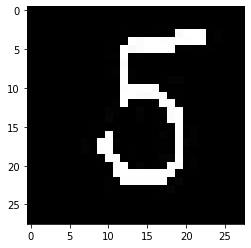

In [ ]:
plt.imshow(number_5.convert('RGBA'))  # отобразим

In [ ]:
number_np = image.img_to_array(number_5) # переводим изображение в numpy массив

In [ ]:
number_np = number_np.astype('float32') # переводим в формат float для нормализации
number_np = number_np / 255  # нормализуем значения

In [ ]:
number_np = number_np.reshape(1,784) # меняем форму, переводим в вектор

In [ ]:
number_np.shape # смотри размер

(1, 784)

In [ ]:
prediction = model.predict(number_np) # распознаем наш пример

In [ ]:
prediction = np.argmax(prediction)  # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction) # выводим ее на экран

5


In [ ]:
number_55 = image.load_img('/content/drive/My Drive/55.JPG', target_size=(28, 28), color_mode = 'grayscale') # загружаем цифру нарисованную от руки
#используем grayscale, чтобы избавиться от оттенков других цветов, база обучалась на цифрах которые нарисованы белым на черном,
# мы пробуем распознать цифру которая нарисована черным на белом, для эксперимента не будем инвертировать цвета

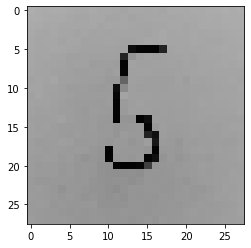

In [ ]:
plt.imshow(number_55.convert('RGBA')) # отображаем цифру

In [ ]:
number_np_5 = image.img_to_array(number_55) # переводим изображение в numpy массив

In [ ]:
number_np_5 = number_np.astype('float32') # переводим в формат float для нормализации
number_np_5 = number_np / 255 # нормализуем значения

In [ ]:
number_np_5 = number_np.reshape(1,784)# меняем форму, переводим в вектор

In [ ]:
prediction = model.predict(number_np_5)# распознаем наш пример

In [ ]:
prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction) # выводим на экран

5
